<a href="https://colab.research.google.com/github/carlossawyerr/Breast-Cancer-Diagnosis-with-Keras/blob/master/NN_Breast_Cancer_Diagnosis_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Imports
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [4]:
#Grab dataset 
!git clone https://github.com/javismiles/Deep-Learning-predicting-breast-cancer-tumor-malignancy.git

Cloning into 'Deep-Learning-predicting-breast-cancer-tumor-malignancy'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 99 (delta 0), reused 0 (delta 0), pack-reused 96
Unpacking objects: 100% (99/99), done.


In [10]:
cd Deep-Learning-predicting-breast-cancer-tumor-malignancy/

/content/Deep-Learning-predicting-breast-cancer-tumor-malignancy


In [11]:
ls

environment.yml  LICENSE          README.md
images/          nn-2l-raw.ipynb  wisconsin-cancer-dataset.csv


In [0]:

#Create dataframe
df = pd.read_csv('wisconsin-cancer-dataset.csv', header=None)

In [124]:
# Columns : Clump Thickness, Uniformity of Cell Size, Uniformity of Cell Shape, Marginal Adhesion, Single Epithelial Cell Size, Bare Nuclei, Bland Chromatin, Normal Nucleoli and Mitoses.
#Last column : 2 for benign, 4 for 
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025.0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,0.0
1,1002945.0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,0.0
2,1015425.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,0.0
3,1016277.0,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,0.0
4,1017023.0,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,0.0


In [0]:
#Normalize Labels
df.loc[:,10].replace(2,0, inplace=True)
df.loc[:,10].replace(4,1, inplace=True)

In [0]:
df = df[~df[6].isin(['?'])]

In [61]:
sorted(df[1].unique())


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [0]:
df = df.astype('float')

In [0]:
names = df.columns[1:10]

In [0]:
# MINMAX NORMALIZATION : new_x= (x- min_x)/(max_x- min_x)
names = df.columns[0:10]
scalar = MinMaxScaler()
scaled_df = scalar.fit_transform(df.iloc[:,0:10])
scaled_df = pd.DataFrame(scaled_df, columns=names)

In [125]:
scaled_df.head()


,0,1,2,3,4,5,6,7,8,9
0,0.069946,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.0
1,0.070164,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.0
2,0.071096,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.0
3,0.071160,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.0
4,0.071216,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.0


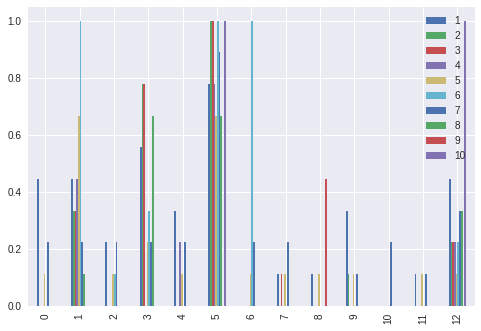

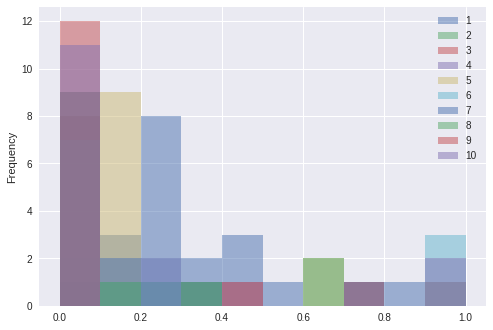

In [81]:
scaled_df[10]= df[10]
scaled_df.iloc[0:13,1:11].plot.bar();
scaled_df.iloc[0:13,1:11].plot.hist(alpha=0.5)

In [0]:
x=scaled_df.iloc[0:500,1:10]
y=df.iloc[0:500,10:]
xval=scaled_df.iloc[501:683,1:10]
yval=df.iloc[501:683,10:]

In [0]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

In [0]:
# create model
model = Sequential()
model.add(Dense(18, input_dim=9, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [113]:
x.shape

(500, 9)

In [121]:

model.fit(x, y, epochs=100, batch_size=12 )

Epoch 1/100
500/500 [==============================] - 0s 101us/step - loss: 0.0736 - acc: 0.9740
Epoch 2/100
500/500 [==============================] - 0s 91us/step - loss: 0.0762 - acc: 0.9720
Epoch 3/100
500/500 [==============================] - 0s 89us/step - loss: 0.0734 - acc: 0.9760
Epoch 4/100
500/500 [==============================] - 0s 98us/step - loss: 0.0729 - acc: 0.9760
Epoch 5/100
500/500 [==============================] - 0s 99us/step - loss: 0.0724 - acc: 0.9760
Epoch 6/100
500/500 [==============================] - 0s 93us/step - loss: 0.0717 - acc: 0.9780
Epoch 7/100
500/500 [==============================] - 0s 99us/step - loss: 0.0721 - acc: 0.9760
Epoch 8/100
500/500 [==============================] - 0s 96us/step - loss: 0.0724 - acc: 0.9740
Epoch 9/100
500/500 [==============================] - 0s 94us/step - loss: 0.0720 - acc: 0.9760
Epoch 10/100
500/500 [==============================] - 0s 91us/step - loss: 0.0717 - acc: 0.9760
Epoch 11/100
500/500 [======

In [123]:
model.evaluate(xval, yval)

182/182 [==============================] - 0s 267us/step


[0.018667056255943174, 1.0]